In [1]:
from ROOT import TH1D,TStyle,TCanvas,TFile,gStyle,TLegend

def h1_style(h1, title): #make the plots pretty
    h1.GetXaxis().SetTitle("X")
    h1.GetYaxis().SetTitle("N(X)")
    h1.GetXaxis().SetTitleSize(0.05)
    h1.GetYaxis().SetTitleSize(0.05)
    
    h1.GetXaxis().SetLabelSize(0.04)
    h1.GetYaxis().SetLabelSize(0.04)
    h1.SetTitle(title)
    
    h1.SetMaximum(1.25*h1.GetMaximum())


Integral H1: 1820.0000000000002, Integral H2: 1892.8000000000009

Histogram Bin Contents:

Format: <bin number> <h1 bin content> <h2 bin content> <data bin content>
Bin 1: 142.64 142.94 137
Bin 2: 136.84 136.85 133
Bin 3: 131.23 131.15 116
Bin 4: 125.38 125.16 124
Bin 5: 119.46 119.48 114
Bin 6: 113.40 113.39 109
Bin 7: 107.74 107.99 99
Bin 8: 101.61 101.77 103
Bin 9: 96.42 96.72 102
Bin 10: 90.19 93.14 78
Bin 11: 84.32 92.36 99
Bin 12: 78.73 93.94 94
Bin 13: 72.74 91.68 98
Bin 14: 66.97 82.17 75
Bin 15: 61.21 69.33 61
Bin 16: 55.25 58.04 64
Bin 17: 49.49 50.24 49
Bin 18: 43.77 43.76 33
Bin 19: 37.83 37.79 32
Bin 20: 31.99 32.05 31
Bin 21: 26.19 26.19 26
Bin 22: 20.34 20.28 15
Bin 23: 14.56 14.67 18
Bin 24: 8.70 8.78 9
Bin 25: 2.98 2.92 1


Info in <TCanvas::Print>: jpg file myPlot.jpg has been created


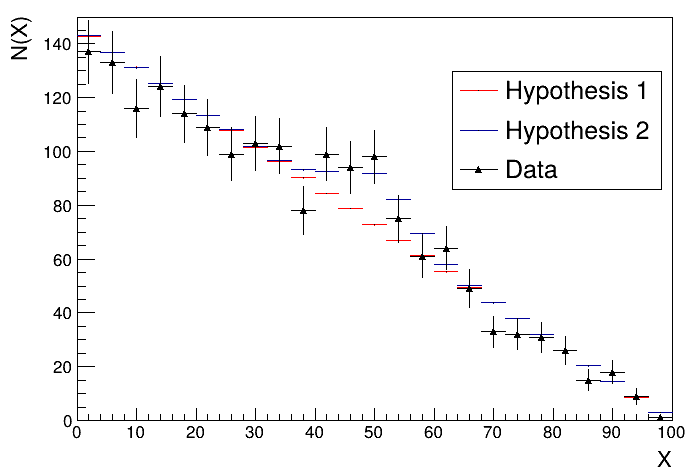

In [2]:
# Tell ROOT to not plot the statistics box on the histograms  
gStyle.SetOptStat(0);

# Open the file with the histograms                                                                                
fin = TFile("hw4_chi2.root","READ")

# Extract histograms     
h1 = fin.Get("Hypothesis 1")
h2 = fin.Get("Hypothesis 2")
data = fin.Get("Data")

# Set the data style with error bars
data.SetLineColor(1);
data.SetMarkerStyle(22);
data.SetMarkerSize(1);

# Adjust the style of the first histogram to be plotted   
h1_style(h1,"")

# Reduce the number of bins from 100 to 25    
rebinFactor = 4;
data.Rebin(rebinFactor);
h1.Rebin(rebinFactor);
h2.Rebin(rebinFactor);

# Normalize hypotheses to the data integral     
h1.Scale(data.Integral())
h2.Scale(data.Integral())

# Report integrals
print("Integral H1: {0}, Integral H2: {1}".format(h1.Integral(),h2.Integral()))

# print out contents of each bin of each histogram     
if True:
    print("\nHistogram Bin Contents:")
    print("\nFormat: <bin number> <h1 bin content> <h2 bin content> <data bin content>")
    for i in range(1,h1.GetNbinsX()+1):
        print("Bin {}: {:.2f} {:.2f} {:.0f}".format(i, h1.GetBinContent(i), h2.GetBinContent(i), data.GetBinContent(i)));



# Now make a plot!
leg = TLegend(0.65,0.6, 0.95, 0.85)
leg.AddEntry(h1, "Hypothesis 1")
leg.AddEntry(h2, "Hypothesis 2")
leg.AddEntry(data, "Data")
leg.SetFillColor(0)

c1 = TCanvas("c1","c1")
h1.Draw()
h2.Draw("same")
data.Draw("PEsame")
c1.SetLeftMargin(0.11)
c1.SetBottomMargin(0.11)
c1.SetTopMargin(0.035)
c1.SetRightMargin(0.035)
leg.Draw("same")
c1.Draw()
c1.Print("myPlot.jpg")